[adaptado de [Programa de cursos integrados Aprendizado de máquina](https://www.coursera.org/specializations/machine-learning-introduction) de [Andrew Ng](https://www.coursera.org/instructor/andrewng)  ([Stanford University](http://online.stanford.edu/), [DeepLearning.AI](https://www.deeplearning.ai/) ) ]

# Representação de Modelo

<figure>
 <img src="./images/C1_W1_L3_S1_Lecture_b.png"   style="width:600px;height:200px;">
</figure>

## Objetivos
Neste laboratório, você irá:
- Aprender a implementar o modelo $f_{w,b}$ para regressão linear com uma variável

## Notação
Aqui está um sumário de algumas notações que você encontrará

|Notação Geral  <img width=70/> | Descrição<img width=350/>| Python (se aplicável) |
| ------------| ------------------------------------------------------------|-|
| $a$ | scalar, não negrito                                                      |-|
| $\mathbf{a}$ | vetor, negrito                                                      |-|
| **Regression** |-|- |-|
|  $\mathbf{x}$ | valores de recursos de exemplos de treino (nesse lab. - Size (1000 sqft))  | `x_train` |   
|  $\mathbf{y}$  | alvos de exemplos de treino (nesse lab. - Price (1000s de dolars))  | `y_train`| 
|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$ exemplo de treino | `x_i`, `y_i`|
| m | quantidades de exemplos de treino | `m`|
|  $w$  |  parâmetro: peso (_weight_)|                                 | `w`    |
|  $b$           |  parâmtro: viés (_bias_)                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ | o resultado da avaliação do modelo em $x^{(i)}$ parametrizado por $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` | 


## Ferramentas
Neste laboratório, você usará: 
- NumPy, uma biblioteca popular para computação científica
- Matplotlib, uma biblioteca popular para plotagem de dados

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
#sorted(plt.style.available)
plt.style.use('classic')

# Definição do problema
<img align="left" src="./images/C1_W1_L3_S1_trainingdata.png"    style=" width:380px; padding: 10px;  " /> 

Conforme mencionado na aula teórica, você usará o exemplo da previsão de preços de imóveis.  
Este laboratório usará um conjunto de dados simples com apenas dois pontos de dados: uma casa com 1.000 pés quadrados (sqft) vendida por \$300.000 e uma casa com 2.000 pés quadrados vendida por \$500.000. Esses dois pontos constituirão nosso *conjunto de dados ou de treinamento*. Neste laboratório, as unidades de tamanho são 1000 pés quadrados e as unidades de preço são milhares de dólares.


| Size (1000 sqft)     | Price (1000s de dólares) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

Você pode ajustar um modelo de regressão linear (mostrado acima como a linha reta azul) por meio desses dois pontos, para poder prever o preço de outras casas - por exemplo, uma casa com 1.200 pés quadrados.

Execute a seguinte célula de código para criar suas variáveis `x_train` e `y_train`. Os dados são armazenados em matrizes NumPy unidimensionais.

In [2]:
# x_train é a variável de entrada (tamanho em 1000 pés quadrados)
# y_train é o alvo (preço 1000s de dólares)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


>**Nota**: Nessa disciplina frequentemente utilizaremos a formatação de saída 'f-string' do python descrita [aqui](https://docs.python.org/3/tutorial/inputoutput.html) ao imprimir. O conteúdo entre chaves é avaliado ao produzir a saída.

### Número de exemplos de treinamento `m`
Você usará `m` para indicar o número de exemplos de treinamento. As matrizes Numpy têm um parâmetro `.shape`, portanto, `x_train.shape` retorna uma tupla python com uma entrada para cada dimensão. `x_train.shape[0]` é o comprimento da matriz e o número de exemplos, conforme mostrado abaixo.

In [3]:
# m é a quantidade de exemplos de treino
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Quantidade de exemplos de treino: {m}")

x_train.shape: (2,)
A quantidade de exemplos de treino: 2


Você também pode usar a função Python `len()` conforme mostrado abaixo.

In [5]:
# m é a quantidade de exemplos de treino
m = len(x_train)
print(f"Quantidade de exemplos de treino: {m}")

A quantidade de exemplos de treino: 2


### Training example `x_i, y_i`

You will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example. Since Python is zero indexed, (x$^{(0)}$, y$^{(0)}$) is (1.0, 300.0) and (x$^{(1)}$, y$^{(1)}$) is (2.0, 500.0). 

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.
Run the next code block below to get the $i^{th}$ training example.


### Exemplo de treinamento `x_i, y_i`

Você usará $(x^{(i)}, y^{(i)})$ para denotar o $i^{th}$ exemplo de treinamento. Como o Python tem índice zero, $(x^{(0)}, y^{(0)})$ é (1.0, 300.0) e $(x^{(1)}, y^{(1)})$ é (2.0, 500.0). 

Para acessar um valor em uma matriz Numpy, indexa-se a matriz com o deslocamento desejado. Por exemplo, a sintaxe para acessar o local zero de `x_train` é `x_train[0]`.
Execute o próximo bloco de código abaixo para obter o exemplo de treinamento $i^{th}$.

In [9]:
i = 0 # Mude para 1 se quiser ver (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


### Plotagem dos dados

Você pode plotar esses dois pontos usando a função `scatter()` da biblioteca `matplotlib`, conforme mostrado na célula abaixo. 
- Os argumentos da função `marker` e `c` mostram os pontos como cruzes vermelhas (o padrão são pontos azuis).

Você pode usar outras funções da biblioteca `matplotlib` para definir o título e os rótulos a serem exibidos.


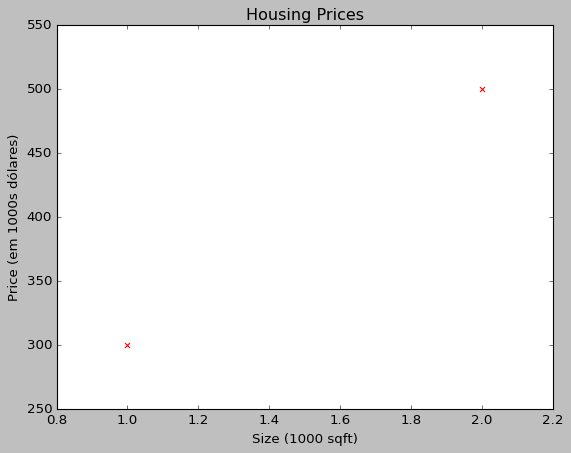

In [10]:
# Plotar os pontos de dados
plt.scatter(x_train, y_train, marker='x', c='r')
# Definir o título
plt.title("Housing Prices")
# Definir o rótulo do eixo y
plt.ylabel('Price (em 1000s dólares)')
# Definir o rótulo do eixo x
plt.xlabel('Size (1000 sqft)')
plt.show()

## Função do modelo

<img align="left" src="./images/C1_W1_L3_S1_model.png"     style=" width:380px; padding: 10px; " > Conforme descrito na aula, o modelo da função para a regressão linear(que é uma função que mapeia `x` para `y`) é representado como

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

A fórmula acima é como você pode representar linhas retas - diferente valores de $w$ e $b$ retornam diferentes linhas retas no gráfico. <br/> <br/> <br/> <br/> <br/> 

Vamos começar com $w = 100$ e $b = 100$.

**Nota: Você pode voltar a esta célula para ajustar os parâmetros w e b do modelo**

In [20]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


Agora, vamos calcular o valor de $f_{w,b}(x^{(i)})$ para seus dois pontos de dados. Você pode escrever isso explicitamente para cada ponto de dados como -

para $x^{(0)}$, `f_wb = w * x[0] + b`

para $x^{(1)}$, `f_wb = w * x[1] + b`

Para um grande número de pontos de dados, isso pode se tornar complicado e repetitivo. Portanto, em vez disso, você pode calcular a saída da função em um loop `for`, conforme mostrado na função `compute_model_output` abaixo.
> **Nota**: A descrição do argumento `(ndarray (m,))` descreve um array n-dimensional do Numpy com a forma (m,). `(scalar)` descreve um argumento sem dimensões, apenas uma magnitude.  
> **Nota**: `np.zero(n)` retornará uma matriz numpy unidimensional com $n$ entradas

In [21]:
def compute_model_output(x, w, b):
    """
    Calcula a previsão de um modelo linear
    Args:
      x (ndarray (m,)): Dados, m exemplos 
      w,b (scalar)    : parâmetros do modelo
    Returns
      f_wb (ndarray (m,)): predição do modelo
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

Agora, vamos chamar a função `compute_model_output` e plotar o resultado.

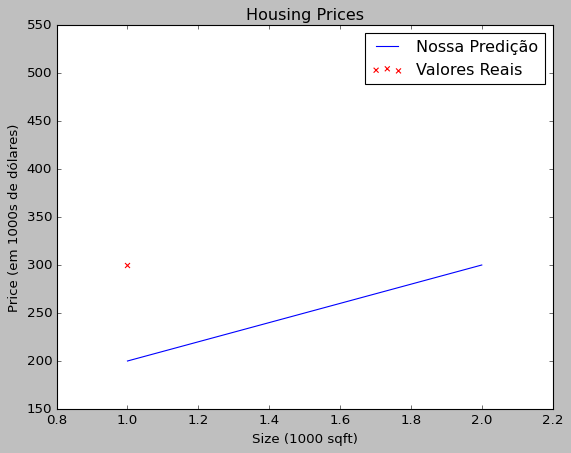

In [22]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# PLotar e predição de nosso modelo
plt.plot(x_train, tmp_f_wb, c='b',label='Nossa Predição')

# Plotar os pontos de dados
plt.scatter(x_train, y_train, marker='x', c='r',label='Valores Reais')

# Definir o título
plt.title("Housing Prices")
# Definir o rótulo do eixo y
plt.ylabel('Price (em 1000s de dólares)')
# Definir o rótulo do eixo x
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

Como você pode ver, definir $w = 100$ e $b = 100$ *não* resulta em uma linha que se ajusta aos nossos dados. 

### Desafio
Tente fazer experimentos com valores diferentes de $w$ e $b$. Quais devem ser os valores para uma linha que se ajuste aos nossos dados?

#### Dica:
Você pode usar o mouse para clicar nas "Dicas" verdes abaixo para revelar algumas dicas para escolher b e w.

<details>
<summary>
    <font size='3', color='darkgreen'><b>Dicas</b></font>
</summary>
    <p>
    <ul>
        <li>Tente $w = 200$ e $b = 100$ </li>
    </ul>
    </p>

### Previsão
Agora que temos um modelo, podemos usá-lo para fazer nossa previsão original. Vamos prever o preço de uma casa com 1.200 pés quadrados. Como as unidades de $x$ estão em milhares de pés quadrados, $x$ é 1,2.

In [16]:
w = 200                         
b = 100    
x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} milhares de dólares")

$340 milhares de dólares


# Parabéns!
Neste laboratório, você aprendeu:
 - A regressão linear cria um modelo que estabelece uma relação entre características e metas
     - No exemplo acima, o recurso era o tamanho da casa e o alvo era o preço da casa
     - Para a regressão linear simples, o modelo tem dois parâmetros $w$ e $b$ cujos valores são "ajustados" usando *dados de treinamento*.
     - Uma vez que os parâmetros de um modelo tenham sido determinados, o modelo pode ser usado para fazer previsões sobre novos dados.